# Task 1


Let us recall a well known dataset:

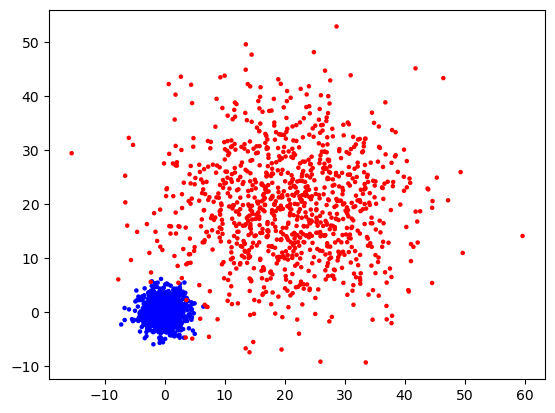

In [127]:
import numpy as np
import pandas as pd
N=1000

df1 = 2*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df2 = 20+10*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])

Data=np.concatenate((df1, df2), axis=0)
Data[:,2]=1
Data[0:N,2]=0

import matplotlib.pyplot as plt

s='b'*N+'r'*N
plt.scatter(Data[:,0],Data[:,1], s=5,alpha=1,c=list(s))

plt.show()


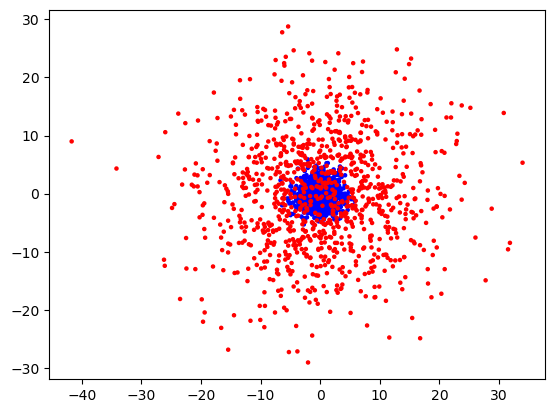

In [128]:
N=1000

df1 = 2*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df2 = 10*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])

Data2=np.concatenate((df1, df2), axis=0)
Data2[:,2]=1
Data2[0:N,2]=0

import matplotlib.pyplot as plt

s='b'*N+'r'*N
plt.scatter(Data2[:,0],Data2[:,1], s=5,alpha=1,c=list(s))

plt.show()

Split this dataset into train and test setes (80%/20%)
and train:

(1) k-neighbors algorithm,

(2) linear regression (How to use it to classification?), 

(3) logistic regression.

Illustrate solutions(by boundary line, our using meshgrid).


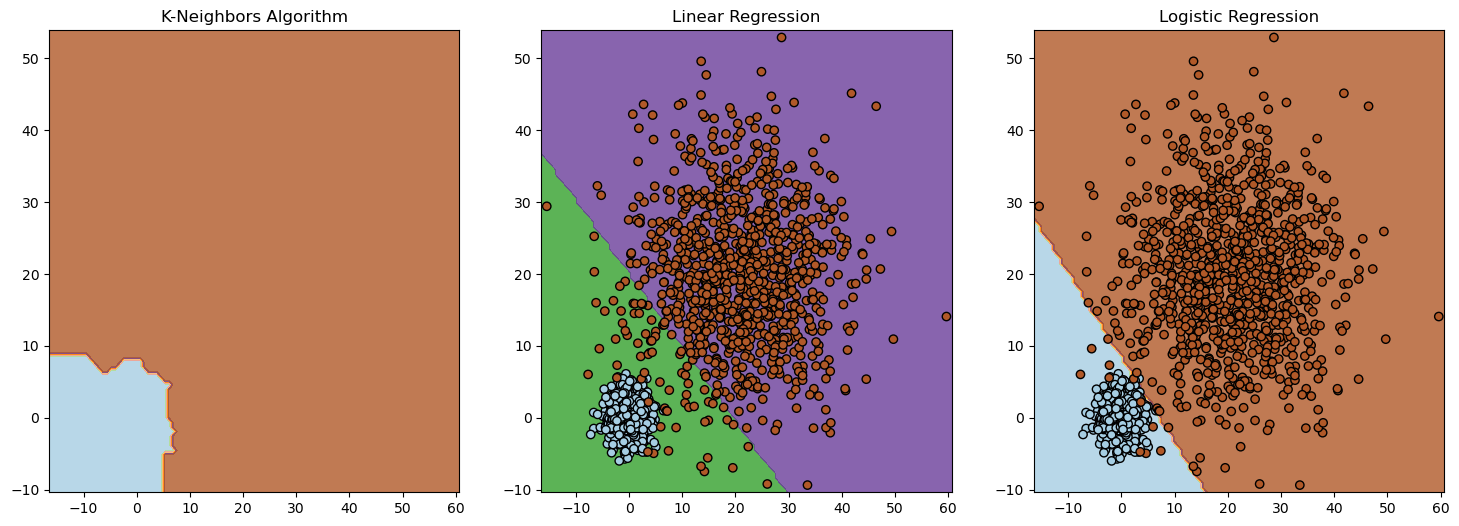

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

train_set, test_set = sklearn.model_selection.train_test_split(Data, test_size=0.2, random_state=42)

x_min = Data[:,0].min()
x_max = Data[:,0].max()
y_min = Data[:,1].min()
y_max = Data[:,1].max()

[x,y] = np.meshgrid(np.linspace(x_min-1, x_max+1, 100),np.linspace(y_min-1, y_max+1, 100), indexing='xy')

grid_points = np.c_[x.ravel() , y.ravel()]

# k-neighbors algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_set[:,:2], train_set[:,2])
knn_predictions = knn.predict(grid_points)
knn_decision_boundary = knn_predictions.reshape(x.shape)

# Linear regression
linear_reg = LinearRegression()
linear_reg.fit(train_set[:,:2], train_set[:,2])
linear_predictions = linear_reg.predict(grid_points) > 0.5 
linear_decision_boundary = linear_predictions.reshape(x.shape)

# Logistic regression
logistic_reg = LogisticRegression()
logistic_reg.fit(train_set[:,:2], train_set[:,2])
logistic_predictions = logistic_reg.predict(grid_points)
logistic_decision_boundary = logistic_predictions.reshape(x.shape)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Neighbors
axes[0].contourf(x, y, knn_decision_boundary, alpha=0.8, cmap=plt.cm.Paired)
# axes[0].scatter(Data[:, 0], Data[:, 1], c=Data[:,2], edgecolor='k', cmap=plt.cm.Paired)
axes[0].set_title("K-Neighbors Algorithm")

# Linear Regression
axes[1].contourf(x, y, linear_decision_boundary, alpha=0.8, cmap=plt.cm.Paired)
axes[1].scatter(Data[:, 0], Data[:, 1], c=Data[:,2], edgecolor='k', cmap=plt.cm.Paired)
axes[1].set_title("Linear Regression")

# Logistic Regression
axes[2].contourf(x, y, logistic_decision_boundary, alpha=0.8, cmap=plt.cm.Paired)
axes[2].scatter(Data[:, 0], Data[:, 1], c=Data[:,2], edgecolor='k', cmap=plt.cm.Paired)
axes[2].set_title("Logistic Regression")

plt.show()

# Task 2

Which model has the best predictive properties? Check it on the test set.
Compare confusion matrices for models from Task 1. Calculate sensitivity and specificity, positive predictive value and $F_1$ score for these models.

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

knn_test_pred = knn.predict(test_set[:,:2])
linear_test_pred = (linear_reg.predict(test_set[:,:2]) > 0.5).astype(int)  # Threshold for classification
logistic_test_pred = logistic_reg.predict(test_set[:,:2])

print("K-Neighbors Classification Report:")
print(classification_report(test_set[:,2], knn_test_pred))
print("K-Neighbors confusion matrix:")
print(confusion_matrix(test_set[:,2], knn_test_pred))

print("\nLinear Regression Classification Report:")
print(classification_report(test_set[:,2], linear_test_pred))
print("Linear Regression confusion matrix:")
print(confusion_matrix(test_set[:,2], linear_test_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(test_set[:,2], logistic_test_pred))
print("Logistic Regression confusion matrix:")
print(confusion_matrix(test_set[:,2], logistic_test_pred))

K-Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       199
         1.0       1.00      1.00      1.00       201

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

K-Neighbors confusion matrix:
[[199   0]
 [  1 200]]

Linear Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       199
         1.0       1.00      0.96      0.98       201

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Linear Regression confusion matrix:
[[199   0]
 [  9 192]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       199
    

# Task 3

Use (a part of) Iris dataset(as below) to train two logistic regression models. For the first model, use the first three variables (drawn on the figure). For the second use all four variables.
Compare confusion matrices, sensitivity, specificity, positive predictive value and $F_1$ score for these models.

Additionaly, draw a boundary plane for the first model.


[[ 5  2]
 [ 0 13]]
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.87      1.00      0.93        13

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20

[[ 6  1]
 [ 0 13]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.93      1.00      0.96        13

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



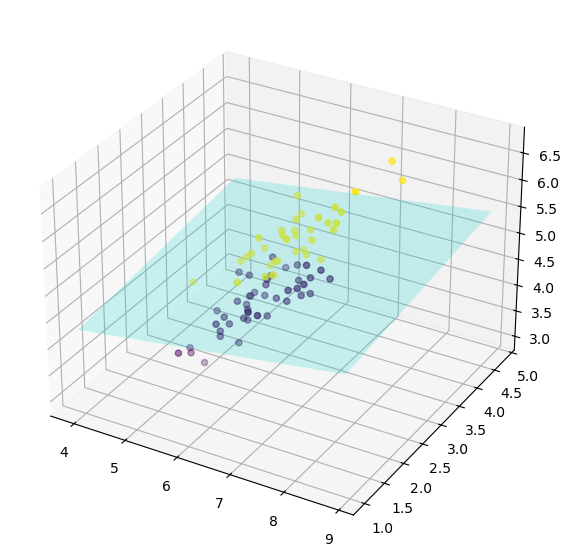

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()


X = iris.data[iris.target!=0]
y = iris.target[iris.target!=0]

%matplotlib inline

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=2137)

log1 = LogisticRegression()
log1.fit(X_train[:, :3], y_train)
predictions_log1 = log1.predict(X_test[:, :3])

log2 = LogisticRegression()
log2.fit(X_train, y_train)
predictions_log2 = log2.predict(X_test)

conf_matrix_log1 = sklearn.metrics.confusion_matrix(y_test, predictions_log1)
conf_matrix_log2 = sklearn.metrics.confusion_matrix(y_test, predictions_log2)
report_log1 = classification_report(y_test, predictions_log1)
report_log2 = classification_report(y_test, predictions_log2)

print(conf_matrix_log1)
print(report_log1)
print(conf_matrix_log2)
print(report_log2)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy, = np.meshgrid(
    np.linspace(x_min, x_max, 30),
    np.linspace(y_min, y_max, 30),
)

zz = (-log1.intercept_[0] - log1.coef_[0, 0] * xx - log1.coef_[0, 1] * yy) / log1.coef_[0, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c = y_train)
ax.plot_surface(xx, yy, zz, color="cyan", alpha=0.2)
plt.show()



# Task 4

The next dataset:


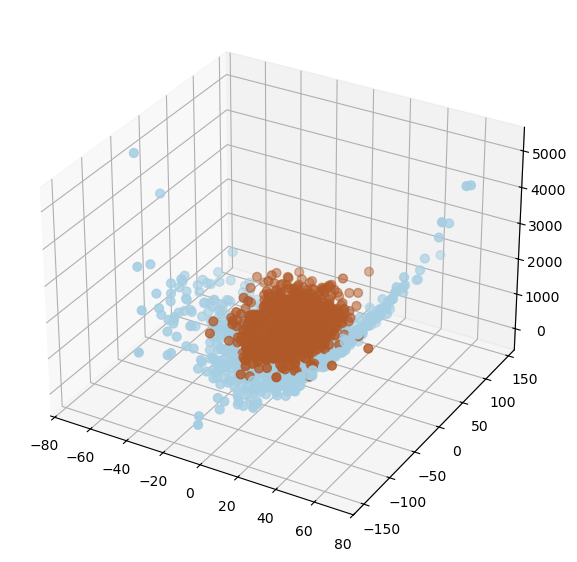

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

N = 1000

df1 = 20 * pd.DataFrame(np.random.randn(N, 4), columns=['A', 'B', 'C', 'D'])
df1['B'] = df1['A'] + 40 * np.random.normal(0, 1, N)
df1['C'] = df1['A'] ** 2 + 100 * np.random.normal(0, 1, N)

scaling_factors = np.array([10, 30, 300, 0])
df2 = pd.DataFrame(np.random.randn(N, 4), columns=['A', 'B', 'C', 'D']) * scaling_factors
df2['C'] = df2['C'] + 1000

Data = np.concatenate((df1, df2), axis=0)
Data[:, 3] = 1 
Data[0:N, 3] = 0 

X = Data[:, :3]
y = Data[:, 3]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.Paired)
plt.show()

Split this dataset into train and test setes (80%/20%)
and train:

(1) k-neighbors algorithm,

(2) logistic regression,

(3) logistic regression, where instead of column 'A' you will take its square ($A^2$).

Compare confusion matrices for these models. Calculate sensitivity, specificity, positive predictive value and $F_1$ score.

Ilustrate models (2) and (3) by boundary plane and boundary surface.



K-Neighbors Confusion Matrix:
[[167  32]
 [ 14 187]]

Logistic Regression Confusion Matrix:
[[158  41]
 [ 30 171]]

Logistic Regression 'sq' Confusion Matrix:
[[199   0]
 [  6 195]]
K-Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       199
         1.0       0.85      0.93      0.89       201

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.89      0.88       400


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       199
         1.0       0.81      0.85      0.83       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400


Logistic Regression 'sq' Classification Report:
              precision    recall  f

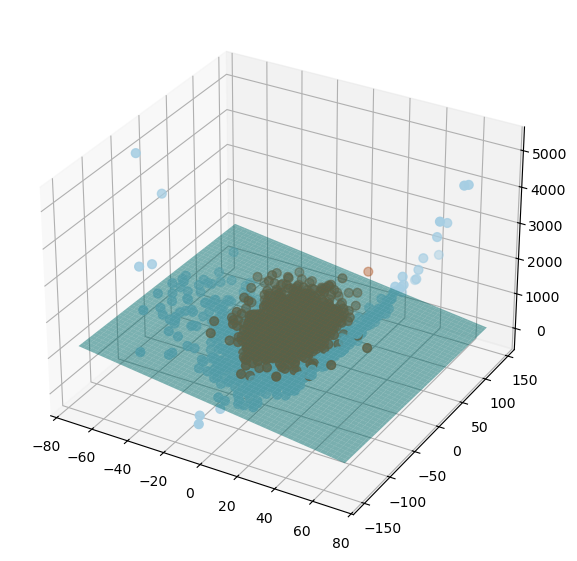

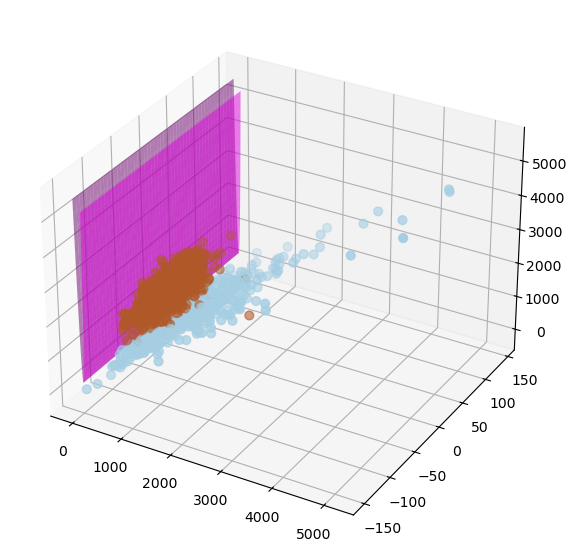

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X = Data[:, :3]
y = Data[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (1) K-Neighbors Algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# (2) Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_predictions = logistic_reg.predict(X_test)

# (3) Logistic Regression 'sq'
X_train_sq = X_train.copy()
X_train_sq[:, 0] = X_train_sq[:, 0] ** 2
X_test_sq = X_test.copy()
X_test_sq[:, 0] = X_test_sq[:, 0] ** 2

logistic_reg_sq = LogisticRegression()
logistic_reg_sq.fit(X_train_sq, y_train)
logistic_predictions_sq = logistic_reg_sq.predict(X_test_sq)

print("K-Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_predictions))
print("\nLogistic Regression 'sq' Confusion Matrix:")
print(confusion_matrix(y_test, logistic_predictions_sq))

print("K-Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print("\nLogistic Regression 'sq' Classification Report:")
print(classification_report(y_test, logistic_predictions_sq))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Logistic Regression Boundary Plane
zz = (-logistic_reg.intercept_[0] - logistic_reg.coef_[0, 0] * xx - logistic_reg.coef_[0, 1] * yy) / logistic_reg.coef_[0, 2]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, s=40)
ax.plot_surface(xx, yy, zz, color="cyan", alpha=0.5)
plt.show()

# Logistic Regression 'sq' Boundary Surface
zz_sq = (-logistic_reg_sq.intercept_[0] - logistic_reg_sq.coef_[0, 0] * (xx ** 2) - logistic_reg_sq.coef_[0, 1] * yy) / logistic_reg_sq.coef_[0, 2]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0] ** 2, X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, s=40)
ax.plot_surface(xx, yy, zz_sq, color="magenta", alpha=0.5)
plt.show()